# Advanced Optimization Methods 
## Discrete Linear Quadratic Problem (DLQP)
### Group 4:
- Chowańska Katarzyna
- Urbanek Mateusz
- Porębski Artur


<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
### 1. Defining variables given during labs introduction

Problem:

\\[ Min \leftarrow y = \frac{1}{2} \sum_{i=1}^{N} (qx_i^2+ru_i^2) + \frac{1}{2} t x_N^2 \\]

So for our problem:

\\[ Min \leftarrow y = \frac{1}{2} \sum_{i=1}^{5} (x_i^2 + \frac{1}{2} u_i^2) + \frac{5}{4} x_N^2 \\]

In [ ]:
import numpy as np

n = 5
x0 = 1.5
a = 1
b = 1.5
q = 1
r = 0.5
t = 2.5
k_arr = np.zeros(n)
x_arr = np.zeros(n)
u_arr = np.zeros(n)

### 2. Initialize `k_arr`, `u_arr` and `x_arr`

In [ ]:
k_arr[n - 1] = t
x_arr[0] = 2
u_arr[0] = -(
    (
        r + b * k_arr[n - 1] * b
    ) ** -1
  ) * b * k_arr[n - 1] * a * x_arr[0]

## 3. Calculating `K`

In [ ]:
for i in range(n - 2, -1, -1):
  k_arr[i] = a * (
      k_arr[i + 1] - k_arr[i + 1] * b * (
          (
              r + b * k_arr[i + 1] * b
          ) ** -1
      ) * b * k_arr[i + 1]
    ) * a + q

## 4. Calculate values of `x` and `y`

In [ ]:
for i in range(0, n - 1):
  u_arr[i] = -(
      (
          r + b * k_arr[i + 1] * b
      ) ** -1
    ) * b * k_arr[i + 1] * a * x_arr[i]

  x_arr[i + 1] = a * x_arr[i] + b * u_arr[i]

## 5. Calculate final value of `J`

In [ ]:
y = (x_arr[0] * x_arr[0] * k_arr[0]) /2

print(f'Final result y={y}')

Final result y=2.3743690547922207


## 6. Plotting results

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

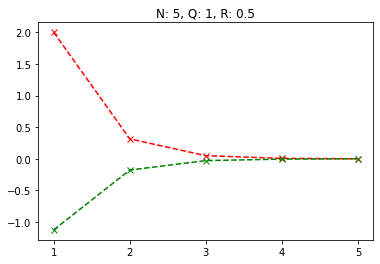

In [ ]:
import matplotlib.pyplot as plt

indices = np.linspace(1, x_arr.shape[0], x_arr.shape[0])

plt.plot(indices, x_arr, 'r--x')
plt.plot(indices, u_arr, 'g--x')
plt.title(f'N: {n}, Q: {q}, R: {r}')
plt.xticks(ticks=indices)
plt